# Portfolio - exploratory analysis project

    # We use some libraries as:  pandas, numpy, matplotlib, seaborn, and scikit-learn


In [44]:
import pandas as pd 
import matplotlib.pyplot as plt  # type: ignore
plt.style.use('ggplot')
import seaborn as sns
import numpy as np 
import os 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [45]:
os.getcwd()

'c:\\Users\\LENOVO\\Desktop\\PORTAFOLIO\\4 de 4 - Python'

In [46]:
ruta = 'c:\\Users\\LENOVO\\Desktop\\PORTAFOLIO\\4 de 4 - Python\\data-movies.csv'

df = pd.read_csv(ruta)

In [47]:
#Let's look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [48]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#1.- Cleaning the data

Let's see if there is any missing data

In [49]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [50]:
for i, col in enumerate(df.columns):
    percent_missing = df[col].isnull().mean()*100
    print(f'{i}: {col} - {percent_missing:.2f}%')

0: name - 0.00%
1: rating - 1.00%
2: genre - 0.00%
3: year - 0.00%
4: released - 0.03%
5: score - 0.04%
6: votes - 0.04%
7: director - 0.00%
8: writer - 0.04%
9: star - 0.01%
10: country - 0.04%
11: budget - 28.31%
12: gross - 2.46%
13: company - 0.22%
14: runtime - 0.05%


In [51]:
#Observando data en 'budget'
df['budget'].sort_index().head(20)

0     19000000.0
1      4500000.0
2     18000000.0
3      3500000.0
4      6000000.0
5       550000.0
6     27000000.0
7     18000000.0
8     54000000.0
9     10000000.0
10    15000000.0
11     5000000.0
12    20000000.0
13     6000000.0
14     6500000.0
15     5100000.0
16           NaN
17    10000000.0
18     1000000.0
19           NaN
Name: budget, dtype: float64

In [52]:
# 'budget' no tiene una tendencia lineal por lo que no se puede interpolar los datos
# 'budget' tiene un porcentaje de valores nulos de 28.31 %, es alto por lo que podríamos eliminar valores nulos
#  pero en este caso completaremos la data con cero
# for this case  we'll fill the missing values with 0


print(df.shape)
#df.dropna(inplace=True)
df['budget'].fillna(0, inplace=True)

print(df.shape)

(7668, 15)
(7668, 15)


In [53]:
#data limpia
#Looking at #Data types for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [54]:
#eliminando los valores nulos (NA) que quedan, menos del 1%
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(7668, 15)
(7412, 15)


In [55]:
#Eliminando duplicados
#drop duplicates
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(7412, 15)
(7412, 15)


In [56]:
#converting 'budget' and 'gross' to type 'int64'
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [57]:
#Data it's perfect 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7412 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   year      7412 non-null   int64  
 4   released  7412 non-null   object 
 5   score     7412 non-null   float64
 6   votes     7412 non-null   float64
 7   director  7412 non-null   object 
 8   writer    7412 non-null   object 
 9   star      7412 non-null   object 
 10  country   7412 non-null   object 
 11  budget    7412 non-null   int64  
 12  gross     7412 non-null   int64  
 13  company   7412 non-null   object 
 14  runtime   7412 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 926.5+ KB


In [58]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [59]:
#Create new colum s for the data 'released' = 'year_correct'
df['year_correct'] =  df['released'].str.extract(r'(\d{4})')


In [60]:
#converting data type to 'int64'
df['year_correct'] = df['year_correct'].astype('int64')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7412 entries, 0 to 7659
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7412 non-null   object 
 1   rating        7412 non-null   object 
 2   genre         7412 non-null   object 
 3   year          7412 non-null   int64  
 4   released      7412 non-null   object 
 5   score         7412 non-null   float64
 6   votes         7412 non-null   float64
 7   director      7412 non-null   object 
 8   writer        7412 non-null   object 
 9   star          7412 non-null   object 
 10  country       7412 non-null   object 
 11  budget        7412 non-null   int64  
 12  gross         7412 non-null   int64  
 13  company       7412 non-null   object 
 14  runtime       7412 non-null   float64
 15  year_correct  7412 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 984.4+ KB


In [62]:
#verificando un solo valor para variables numericas
df.describe()

#std <> 0, por lo que los datos son diferentes(no hay valor unico)

,year,score,votes,budget,gross,runtime,year_correct
count,7412.000000,7412.000000,7.412000e+03,7.412000e+03,7.412000e+03,7412.000000,7412.000000
mean,2000.640718,6.396910,9.076357e+04,2.633644e+07,7.899355e+07,107.446438,2000.848354
std,11.028736,0.963162,1.653466e+05,3.897175e+07,1.662164e+08,18.517471,11.050378
min,1980.000000,1.900000,1.050000e+02,0.000000e+00,3.090000e+02,63.000000,1980.000000
25%,1991.000000,5.800000,1.000000e+04,0.000000e+00,4.633888e+06,95.000000,1991.750000
50%,2001.000000,6.500000,3.400000e+04,1.300000e+07,2.040352e+07,104.000000,2001.000000
75%,2010.000000,7.100000,9.600000e+04,3.302500e+07,7.644231e+07,116.000000,2010.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,2020.000000


In [63]:
#verificando un solo nivel para variable categorica
cols_cat = df.select_dtypes(include=['object'])
cols_cat.columns

for i, col in  enumerate(cols_cat.columns):
    print(f'{col}: {df[col].nunique()}')

#más de un solo valor o nivel para variable categórica,por lo que está bien.
# it's perfect

name: 7267
rating: 12
genre: 18
released: 3292
director: 2816
writer: 4354
star: 2652
country: 57
company: 2242


* Verificamos valores atípicos

        #Para variables numericas: gráfico boxplot
        #Para variables categóricas: gráfico de countplot

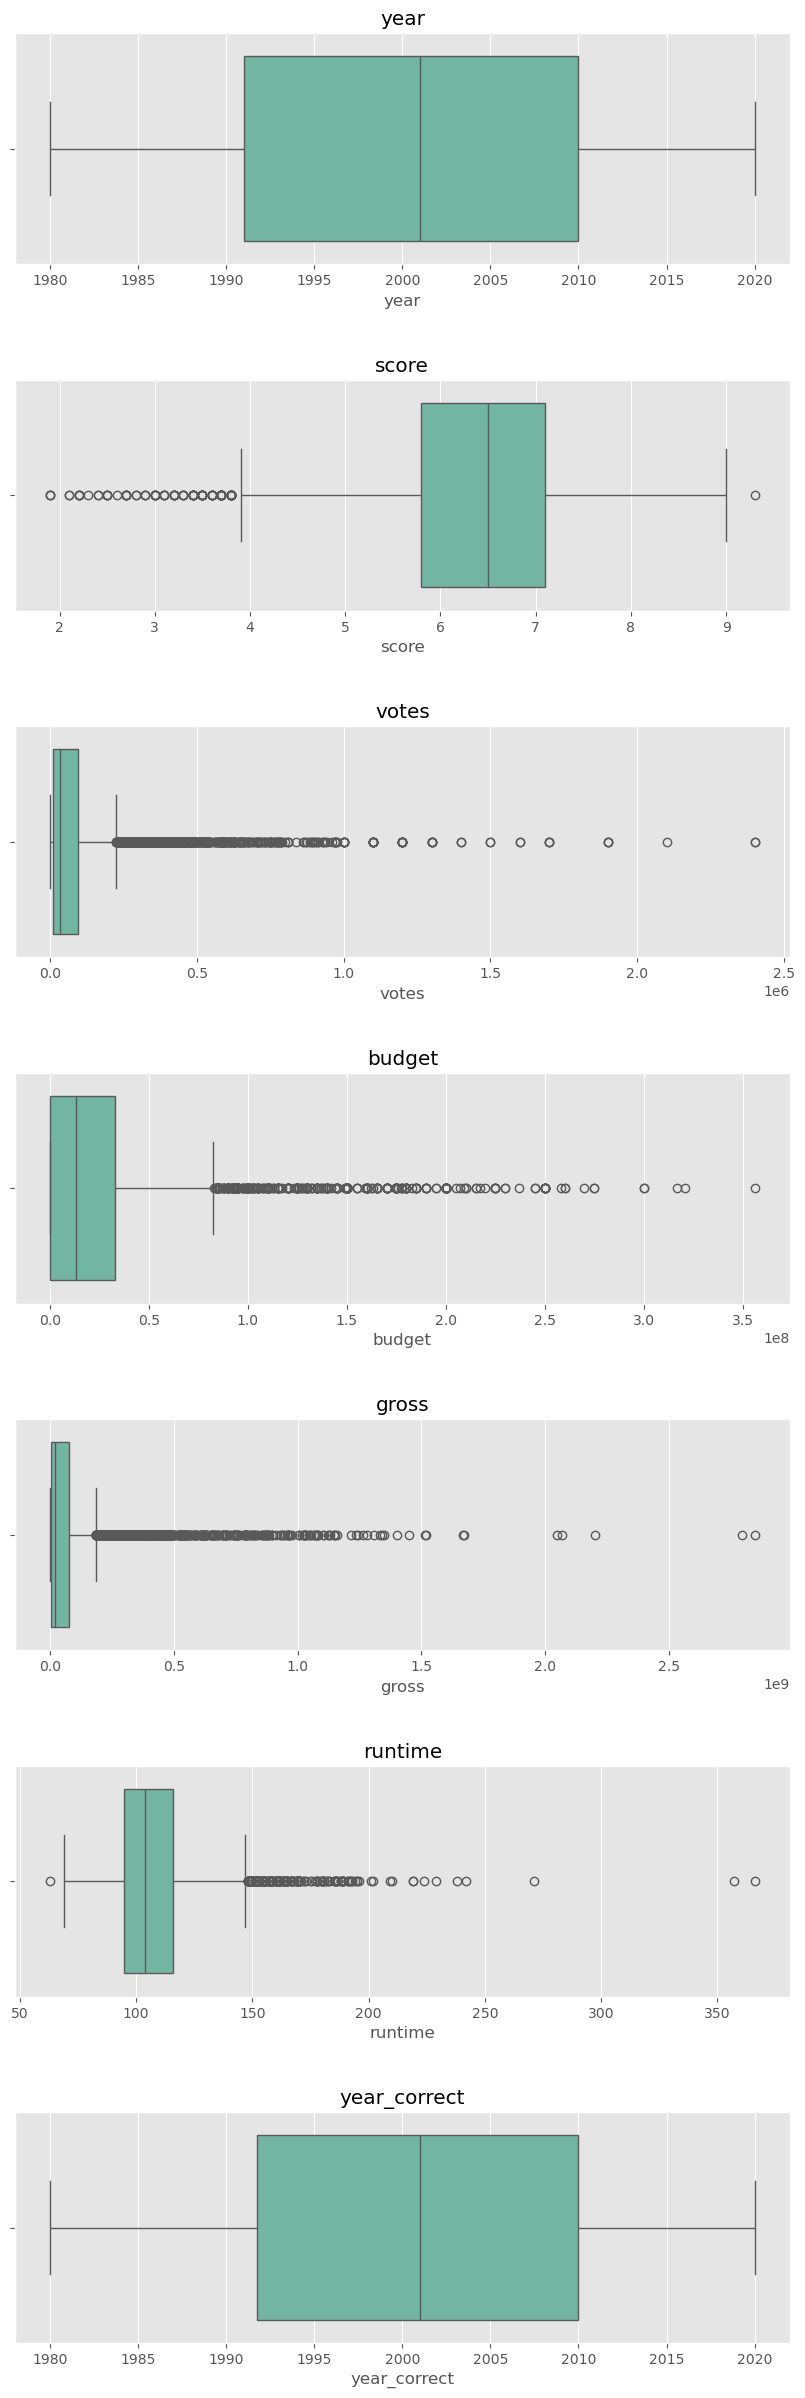

In [64]:
#verificamos valores atipicos en variables numericas con grafico boxplot

cols_num = df.select_dtypes(include=['int64','float64'])
#cols_num

#definimos dimensiones para la gráfica
fig, ax = plt.subplots(nrows= 7, ncols=1, figsize = (10, 30))
#definimos el espacio entre gráfica
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(cols_num):
    #definimos gráfico
    sns.boxplot(x=col, data= df, ax=ax[i], palette='Set2')
    ax[i].set_title(col)


Observaciones: 

        * Valores atípicos:

            runtime < 80 
            runtime > 250
        La duración de esas películas exceden el rango mínimo y máximo de una película normal.
        Pero existen y tienen ingresos 'gross' por lo que no vamos a eliminarlas

In [65]:
cols_cat = df.select_dtypes(include=['object'])
cols_cat.columns

Index(['name', 'rating', 'genre', 'released', 'director', 'writer', 'star',
       'country', 'company'],
      dtype='object')

In [66]:
#seleccionamos las variables categoricas que tienen valores repetidos y/o errores ortograficos para corregirlo
cols_cat = df[['rating','genre']]
cols_cat.columns

Index(['rating', 'genre'], dtype='object')

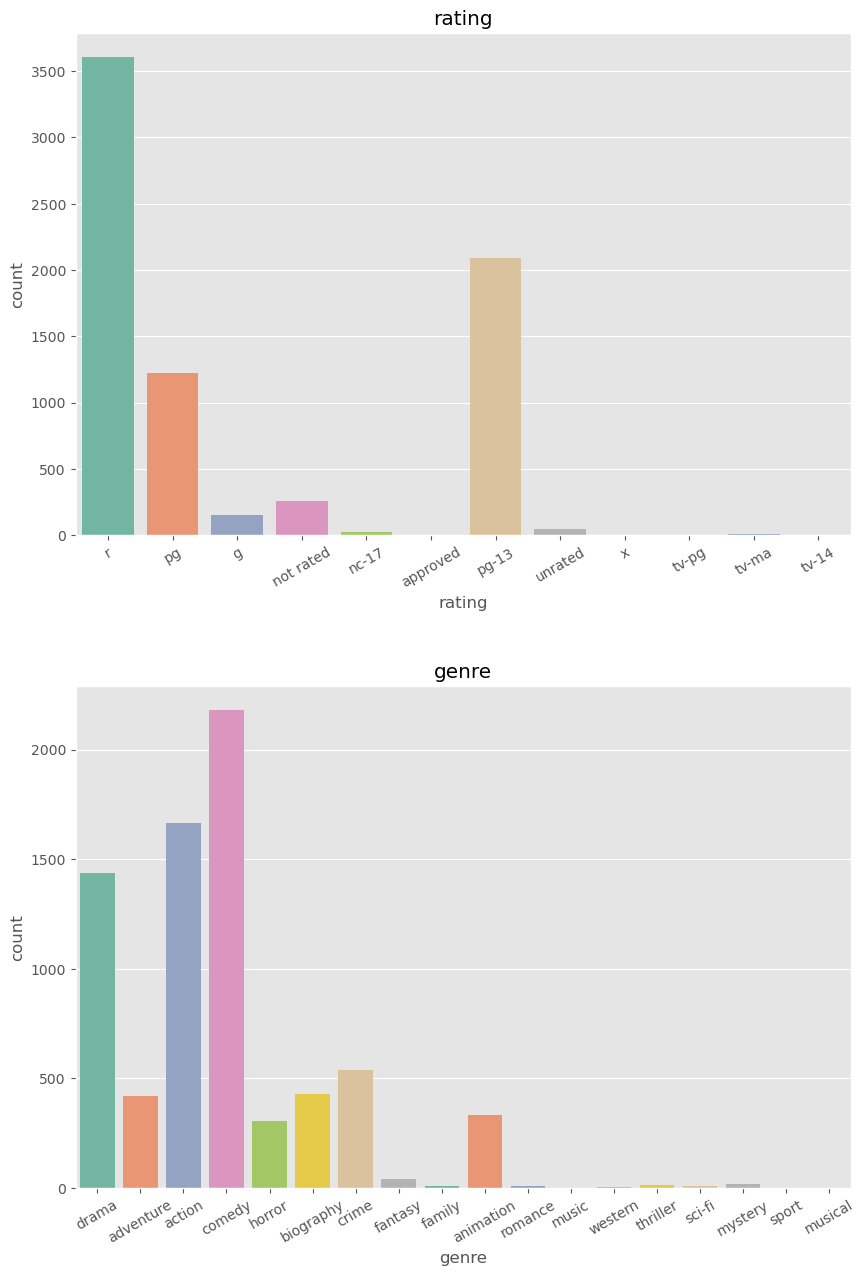

In [67]:
#corrigiendo valores atípicos en variables categóricas con grafico countplot
for column in df:
    if column in cols_cat:
        df[column] = df[column].str.lower()

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
fig.subplots_adjust(hspace=0.3)

#iteramos
for i, col in enumerate(cols_cat):
    sns.countplot(x=col,data=df, ax=ax[i], palette='Set2')
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 30)

#No hay errores ortográficos, por lo que  se puede proceder a la siguiente etapa.

#pasamos a la etapa de exploracion de datos

#buscamos que variables tienen una correlacion más fuerte con el nivel de ingresos bruto = 'gross'

In [68]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'year_correct'],
      dtype='object')

In [69]:
#antes de pasar a la siguiente etapa, analizamos que variables son revelantes para nuestro análisis exploratorio
print(df.shape)
cols_eliminar = ['year', 'released', 'year_correct'] #variables irrelevantes 
df.drop(columns=cols_eliminar,inplace=True)
print(df.shape)

(7412, 16)
(7412, 13)


# Análisis Individual

            Observamos la distribucion de los datos
            variables numericas: histograma
            variables categóricas: countplot


usamos un mapa de calor para identificar que variables tienen mayor correlacion con 'gross' y proceder a analizarlas

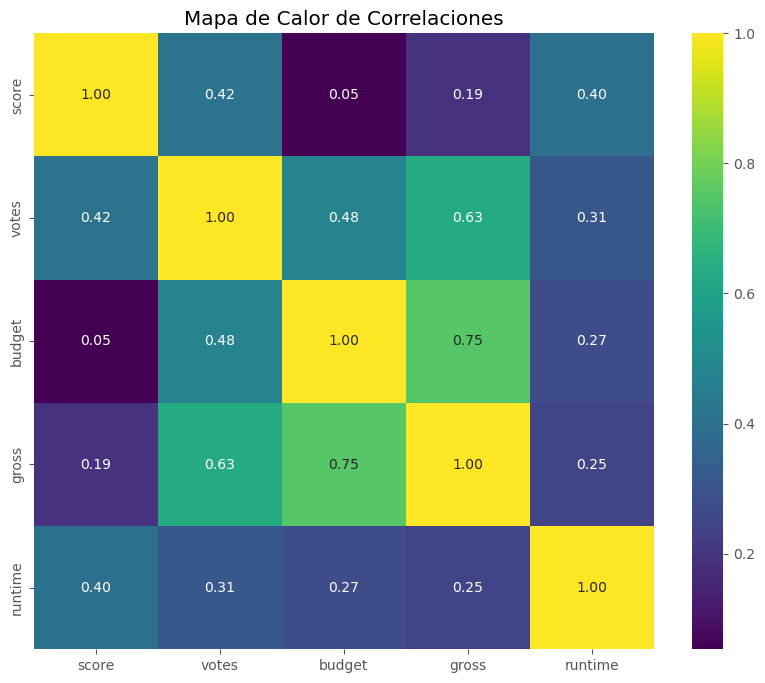

In [70]:
cols_num = df.select_dtypes(include=['int64','float64'])

#calculamos la matriz de correlacion
correlation_matrix = cols_num.corr()

#creamos el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

variables numericas a analizar: porcentaje de correlacion

                        'budget'(0.75)
                        'votes'(0.63)

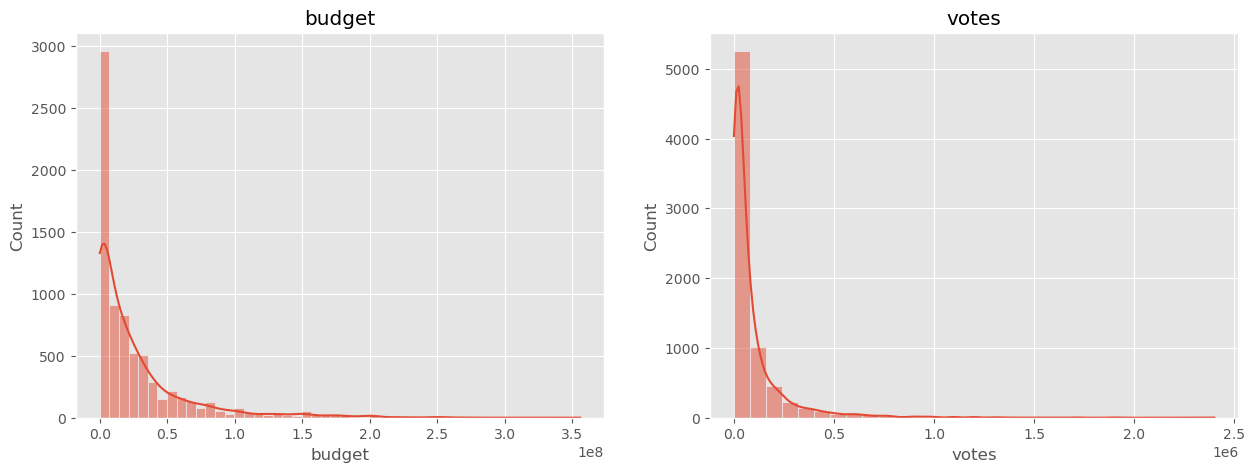

In [71]:
cols_num = df[['budget','votes']]
#Distribucion de datos: variables numéricas
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=1)

#iteramos sobre cada columna:
for i, col in enumerate(cols_num):
    #definimos los bins:
    if col=='budget':
        nbins = 50
    else:
        nbins = 30
    #ubicamos el gráfico en la subtrama correcta
#creamos la gráfica
    sns.histplot(x=col, data=df, ax=ax[i],bins=nbins, kde=True, palette='Set2')
    ax[i].set_title(col)

In [72]:
cols_num.describe()

,budget,votes
count,7.412000e+03,7.412000e+03
mean,2.633644e+07,9.076357e+04
std,3.897175e+07,1.653466e+05
min,0.000000e+00,1.050000e+02
25%,0.000000e+00,1.000000e+04
50%,1.300000e+07,3.400000e+04
75%,3.302500e+07,9.600000e+04
max,3.560000e+08,2.400000e+06


Observamos que:
    .Ambas variables presentan asímetría positiva, es decir la mayor cantidad de sus datos están sesgados hacia el lado derecho, budget: entre 0 - 33 millones, votes: 
    
    .'budget': tiene un promedio de 26 millones $ y el 75% de las películas tienen un presupuesto menor a '33 millones' $
               y el 50% de las peliculas tienen un presupuesto menor a '13 millones' $

    'votes': tiene un promedio de 90,763 y el 75% de las peliculas tienen menos de 96,000 votos.


# Analisis univariado
        #Analisis de correlacion entre variables
        #buscamos las variables con mayor correlacion a la variable 'gross'
        #hacemos un mapa de calor, para una comparación Rápida entre todas las variables numericas.

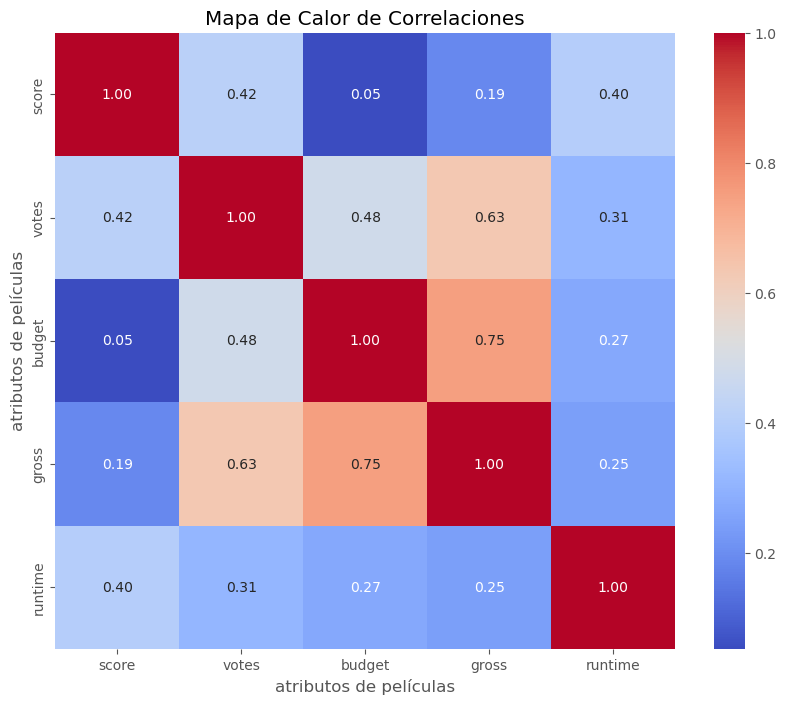

In [73]:
cols_num = df.select_dtypes(include=['int64','float64'])

#calculamos la matriz de correlacion
correlation_matrix = cols_num.corr()

#creamos el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.xlabel('atributos de películas')
plt.ylabel('atributos de películas')
plt.show()


Observamos que:

        .Las variables numéricas con mayor correlacion respecto a 'gross':
            .'budget'(0.75)
            .'votes'(0.63)

In [74]:
#Analizamos las variables categóricas a traves de un gráfico de dispersion 'scatter'
def GraficarUni(variable_predictora,variable_predecible,type='line', titulo = '', xlabel = None, ylabel = None):
    x= variable_predictora
    y = variable_predecible

    if   type =='line':
         plt.figure(figsize=(10,6))
         sns.lineplot(x=variable_predictora, y=variable_predecible, data=df, palette='Set2')
    elif type == 'regplot':
         plt.figure(figsize=(12,8))
         sns.regplot(x=variable_predictora, y=variable_predecible, data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})
    elif type == 'scatter':
         plt.figure(figsize=(12,8))
         sns.scatterplot(x=variable_predictora, y=variable_predecible, data=df, palette='Set2')
         
        
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
                
    plt.grid(True)
    plt.title(titulo)
    plt.show()
    
    

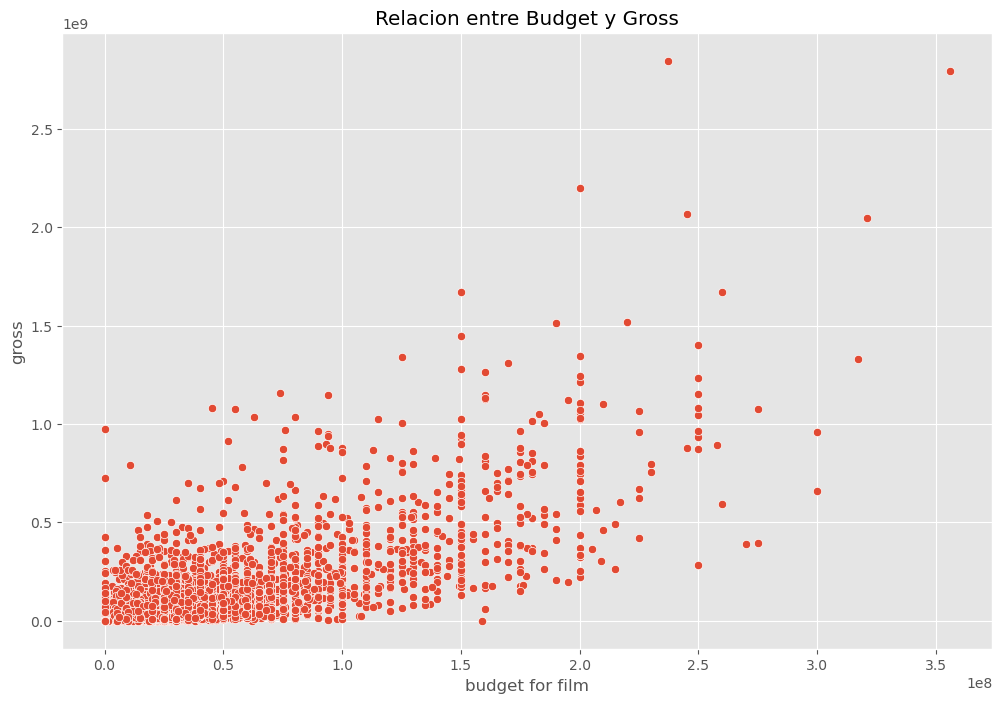

In [75]:
#analizamos las variables numericas con mayor correlacion respecto a 'gross'
GraficarUni('budget','gross', titulo='Relacion entre Budget y Gross', type='scatter', xlabel='budget for film')



Observamos que:

.existe una tendencia lineal entre 'budget' y 'gross', a medida que aumenta el presupuesto de las películas, estas aumentan el nivel de 'ganancias brutas'

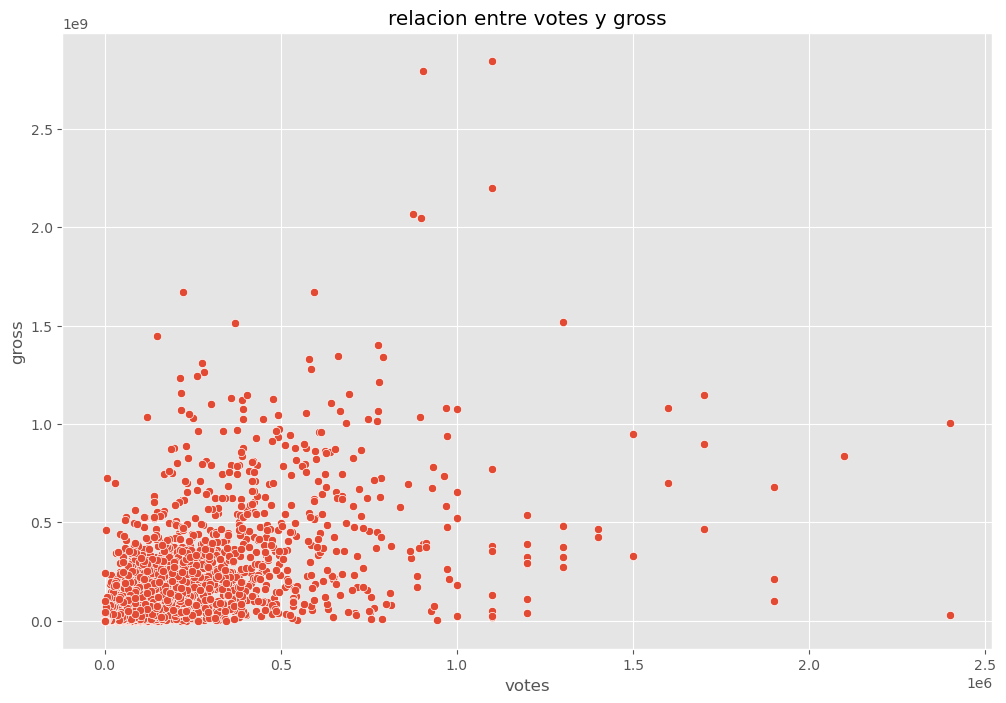

In [76]:
GraficarUni('votes','gross',type='scatter', titulo='relacion entre votes y gross')

Se observa una ligera tendencia lineal, a medida que la película es más votada, aumenta el nivel de ganancias ('gross').

A slight linear trend is observed, as the film receives more votes, the level of earnings ('gross') increases.

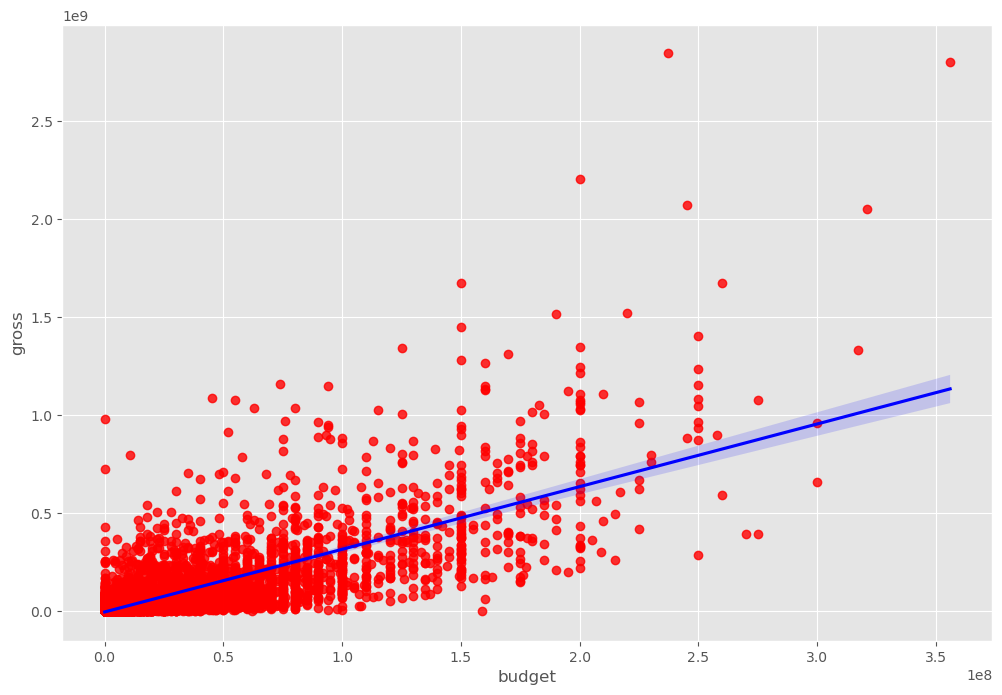

In [77]:
#usamos otro gráfico para observar la regresión  lineal: 'regplot'
GraficarUni('budget','gross', type='regplot')

#

let's stat looking at correlation: 

In [78]:
#differents methods to looking at correlation: 'Pearson',  'Spearman', 'Kendall'
#correlation = df.corr(method='pearson')
correlation_matrix 



,score,votes,budget,gross,runtime
score,1.000000,0.415190,0.053021,0.188071,0.397226
votes,0.415190,1.000000,0.481902,0.631110,0.309945
budget,0.053021,0.481902,1.000000,0.749330,0.269020
gross,0.188071,0.631110,0.749330,1.000000,0.245117
runtime,0.397226,0.309945,0.269020,0.245117,1.000000


In [79]:
#convirtiendo las variables 'object' a 'categoricas'
df_numerized = df.copy()
for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        #convertimos las columnas de tipo 'object' a 'category'
        df_numerized[col] = df_numerized[col].astype('category')
        #asignamos identificadores numericos a las categóricos
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized        

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6372,6,6,8.4,927000.0,2471,3851,979,52,19000000,46998772,2179,146.0
1,5373,6,1,5.8,65000.0,2169,1564,306,53,4500000,58853106,686,104.0
2,4956,4,0,8.7,1200000.0,1063,2464,1642,53,18000000,538375067,1446,124.0
3,277,4,4,7.7,221000.0,1248,1920,2112,53,3500000,83453539,1697,88.0
4,993,6,4,7.3,108000.0,1010,499,387,53,6000000,39846344,1665,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,5432,4,1,6.8,42000.0,438,2838,895,6,135000000,111105497,17,100.0
7652,5586,3,0,6.8,3700.0,1048,1602,2645,8,80000000,461421559,350,149.0
7653,6265,6,5,5.4,2400.0,2404,3726,2300,53,0,3661,1786,98.0
7656,6792,5,4,5.0,294.0,2399,3719,2241,53,0,413378,1788,120.0


In [80]:
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,r,drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,r,adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,pg,action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,pg,comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,r,comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


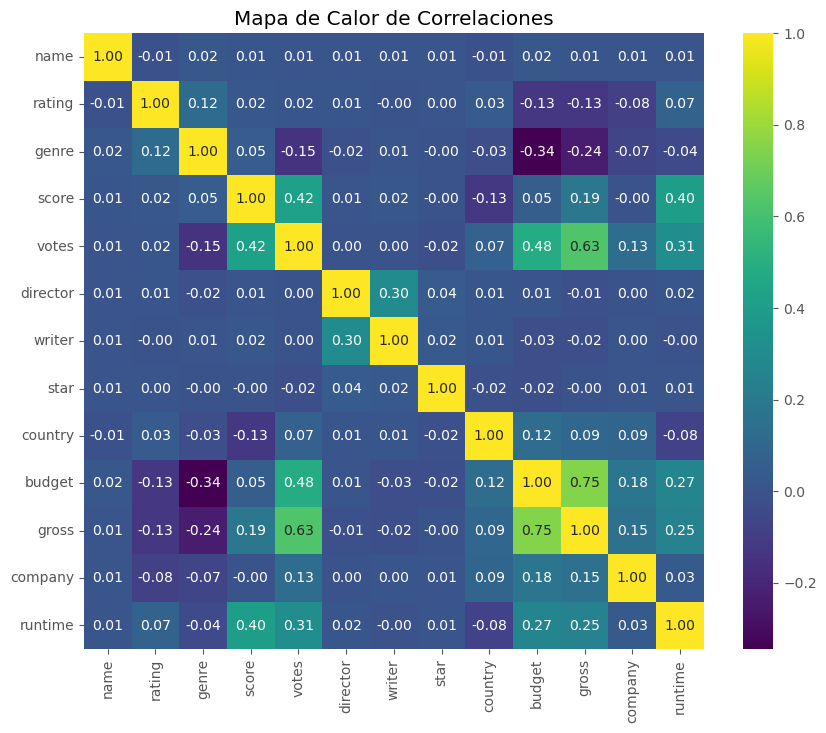

In [81]:
#haciendo un mapa de calor para todas las variables

#calculamos la matriz de correlacion
correlation_matrix = df_numerized.corr()

#creamos el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [82]:
#correlation in pairs
#observamos las variables numericas y categoricas que tienen mayor correlacion con 'gross'
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs['gross']

name        0.005135
rating     -0.131786
genre      -0.242597
score       0.188071
votes       0.631110
director   -0.014296
writer     -0.024021
star       -0.002451
country     0.091951
budget      0.749330
gross       1.000000
company     0.153980
runtime     0.245117
dtype: float64

In [83]:
#ordenando los pares de correlacion 
sorted_pairs = corr_pairs.sort_values()

#mostrando solo pares de correlacion mas altas

highest_corr_pairs = sorted_pairs[(sorted_pairs)>0.5]
highest_corr_pairs

votes     gross       0.63111
gross     votes       0.63111
          budget      0.74933
budget    gross       0.74933
name      name        1.00000
writer    writer      1.00000
gross     gross       1.00000
budget    budget      1.00000
country   country     1.00000
star      star        1.00000
director  director    1.00000
votes     votes       1.00000
score     score       1.00000
genre     genre       1.00000
rating    rating      1.00000
company   company     1.00000
runtime   runtime     1.00000
dtype: float64

Concluimos que:

    Las variables que más influyen en el nivel de ingresos brutos ('gross') de una película es:
             'budget'(presupuesto): 0.75
             'votes'(votos): 0.63


We conclude that:

The variables that most influence the level of 'gross' of a film are:

            'budget': 0.75
            'votes': 0.63    